In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")

In [48]:
data_path='../data/'
instrument='BTC'
data  = pd.read_csv(data_path+instrument+'.csv', names=['date','open','high','low','close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
BTC=pd.DataFrame(data[["close"]])


instrument= "XRP"
data  = pd.read_csv(data_path+instrument+'.csv', names=['date','open','high','low','close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
XRP=pd.DataFrame(data[["close"]])

instrument= "ETH"
data  = pd.read_csv(data_path+instrument+'.csv', names=['date','open','high','low','close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
ETH=pd.DataFrame(data[["close"]])

instrument= "BCH"
data2  = pd.read_csv(data_path+instrument+'.csv', names=['date','open','high','low','close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
BCH=pd.DataFrame(data[["close"]])


instrument= "LTC"
data  = pd.read_csv(data_path+instrument+'.csv', names=['date','open','high','low','close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
LTC=pd.DataFrame(data[["close"]])

close= pd.concat([BTC, ETH,  XRP,BCH,LTC], axis=1)
close.columns= [ "BTC", "ETH",  "XRP","BCH","LTC"]
close=close.dropna()

In [49]:
close.head(10)

,BTC,ETH,XRP,BCH,LTC
date,,,,,
2015-08-07,279.58,2.770000,0.008152,2.770000,4.21
2015-08-08,261.00,0.753325,0.008476,0.753325,3.85
2015-08-09,265.08,0.701897,0.008808,0.701897,3.90
2015-08-10,264.47,0.708448,0.008750,0.708448,3.95
2015-08-11,270.39,1.070000,0.008591,1.070000,4.16
2015-08-12,266.38,1.220000,0.008271,1.220000,3.99
2015-08-13,264.08,1.830000,0.008147,1.830000,3.88
2015-08-14,265.68,1.830000,0.008337,1.830000,4.03
2015-08-15,261.55,1.690000,0.008420,1.690000,3.93


In [50]:
from sklearn.decomposition import PCA
import numpy as np
num_pc = 2

X = np.asarray(close)
[n,m] = X.shape
print (format(n))
print (format(m))

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print ('{0:.2f}% of the variance is explained by the first 2 PCs'.format(percentage_cum[-1]*100))

pca_components = pca.components_

885
5
100.00% of the variance is explained by the first 2 PCs


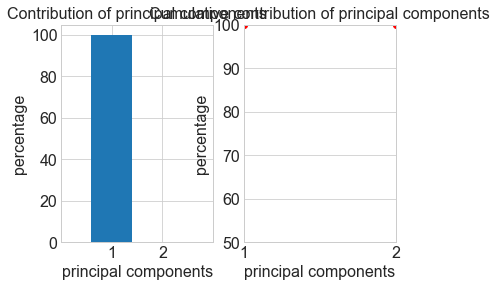

In [51]:
x = np.arange(1,len(percentage)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of principal components',fontsize = 16)
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.title('Cumulative contribution of principal components',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, num_pc])
plt.ylim([50,100]);

In [52]:
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2"], 
                              index=close.index,
                              data=factor_returns)
factor_returns.head()

,factor 1,factor 2
date,,
2015-08-07,279.206923,15.504213
2015-08-08,260.470282,17.059271
2015-08-09,264.535636,17.415555
2015-08-10,263.928550,17.360463
2015-08-11,269.872203,17.255016


In [53]:
factor_exposures = pd.DataFrame(index=["factor 1", "factor 2"], 
                                columns=close.columns,
                                data = pca.components_).T

In [54]:
factor_exposures

,factor 1,factor 2
BTC,0.997472,0.070305
ETH,0.049184,-0.704096
XRP,0.000071,-0.001201
BCH,0.049184,-0.704096
LTC,0.014539,-0.059613


In [55]:
labels = factor_exposures.index
data = factor_exposures.values

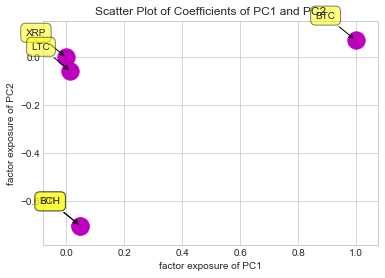

In [56]:
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='m',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    );